# Scope: 
**We are  analyst at a big online store. Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue.
We need to prioritize these hypotheses, launch an A/B test, and analyze the results.**

**At the end we should get a conclusion what Hypothesis are best, what group shows better results between users in groups A and B, via testing and analyzing data as a proof**


## Part 1. Prioritizing Hypotheses

### The task is to:
    1.Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
    2.Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
    3.Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.


#### Preprocess Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


hypothesis_data = pd.read_csv('/datasets/hypotheses_us.csv',sep=";")
display(hypothesis_data.info())
display(hypothesis_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


**Loaded hypothesis_data and see that all data values are between 1 to 10 as expected, no decimal values, nothing looks odd. The only thing I had to do was to add sep';' when reading file to separate columns and values**

In [2]:
transactions = pd.read_csv('/datasets/orders_us.csv')
transactions['date']=pd.to_datetime(transactions['date'], format ='%Y-%m-%d')
transactions=transactions.rename(columns = {'date': 'transaction_date'}, inplace = False)

display(transactions.info())
display(transactions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId       1197 non-null int64
visitorId           1197 non-null int64
transaction_date    1197 non-null datetime64[ns]
revenue             1197 non-null float64
group               1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


None

,transactionId,visitorId,transaction_date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


**Transactions look good, no nan values or weird values. Changed date to date format and renamed transaction_date. All good here, but we may later need to check if users happen to be in both groups A and B. If we have such instance we will remove all records with those users to remove confusion records.**

In [3]:
visitors = pd.read_csv('/datasets/visits_us.csv')
visitors['date']=pd.to_datetime(visitors['date'], format ='%Y-%m-%d')
display(visitors.info())
display(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


**Visitors data looks good, changed date type to date format**

<div class="alert alert-success">
<b>Success:</b> Great that you did columns renaming and data type converting in one block, just after file reading.
</div>

#### Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.


In [4]:
y=transactions[['visitorId','group']]
x=y[y.groupby('visitorId')['group'].transform('nunique') == 2].sort_values(by='visitorId')
display(x.sort_values(by='visitorId').tail(2))# outputs last 2 records where user is in group A and B
x=x.sort_values(by='visitorId')
display('Number of users who happen to be in Groups A and B:',len(x['visitorId'].unique()))
x=x['visitorId'].to_list()
transactions = transactions[~transactions['visitorId'].isin(x)]
display(transactions[transactions['visitorId']=='4266935830']); # testing to see if we get the user that appeared in group A and B


,visitorId,group
662,4266935830,A
682,4266935830,B


'Number of users who happen to be in Groups A and B:'

58

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,transactionId,visitorId,transaction_date,revenue,group


**Above we have output a sample user that is in group A and B. My calculation shows that we have 58 users that appear in multiple groups. I decided to totally remove those 58 users because I can't tell which group these users belong to, and it is best to remove them from our data to work with accurate data only.**

<div class="alert alert-success">
<b>Success:</b> Yes, sounds reasonable.
</div>

<span style="color:red">**Preprocess Summary:**</span>

**We read the files and separated columns to format nicely. We then converted all data to year,month,date format. Lastly we removed all records of users that appear in group A and B at the same time; this was done to make sure our AB test is not going to be skewed.**

#### 1.Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

<div class="alert alert-warning">
<b>Remarks: </b> I found several empty code and markdown cells in your notebook. Is this a bug or a feature :) ?
</div>

<div class="alert alert-info"> <b>That was just place holders to test code, I leave it in places I like to test piece of code:</b> Nothing special.</div>

In [5]:
hypothesis_data['ICE'] = (hypothesis_data['Impact'] * hypothesis_data['Confidence'] )/hypothesis_data['Effort']
display(hypothesis_data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False))


,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


**Our Higherst ICE score hypothesis is: under index 8 - Launch a promotion that gives users discounts  scoring 16.2, while second highest scored 13.33.**

#### 2.Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.


In [6]:
hypothesis_data['RICE'] = (hypothesis_data['Impact'] * hypothesis_data['Reach'] *hypothesis_data['Confidence'])/hypothesis_data['Effort']
display(hypothesis_data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False))


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


**Our Higherst RICE score hypothesis is: under index 7 - Add a subscription form to all the main pages scoring 112, while second highest scored 56.**

<div class="alert alert-success">
<b>Success:</b> Well done!
</div>

####    3.Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.


,Hypothesis,RICE,ICE,Reach
7,Add a subscription form to all the main pages....,112.0,11.200000,10
2,Add product recommendation blocks to the store...,56.0,7.000000,8
3,Change the category structure. This will incre...,9.0,1.125000,8
6,Show banners with current offers and sales on ...,40.0,8.000000,5
0,Add two new channels for attracting traffic. T...,40.0,13.333333,3
4,Change the background color on the main page. ...,3.0,1.000000,3
5,Add a customer review page. This will increase...,4.0,1.333333,3
1,Launch your own delivery service. This will sh...,4.0,2.000000,2
8,Launch a promotion that gives users discounts ...,16.2,16.200000,1


,Reach,Impact,Confidence,Effort,ICE,RICE
Reach,1.000000,-0.179324,0.144596,-0.031417,-0.055611,0.715483
Impact,-0.179324,1.000000,0.734052,0.401831,0.856255,0.347081
Confidence,0.144596,0.734052,1.000000,0.066679,0.918301,0.628097
Effort,-0.031417,0.401831,0.066679,1.000000,-0.024215,-0.116133
ICE,-0.055611,0.856255,0.918301,-0.024215,1.000000,0.513130
RICE,0.715483,0.347081,0.628097,-0.116133,0.513130,1.000000


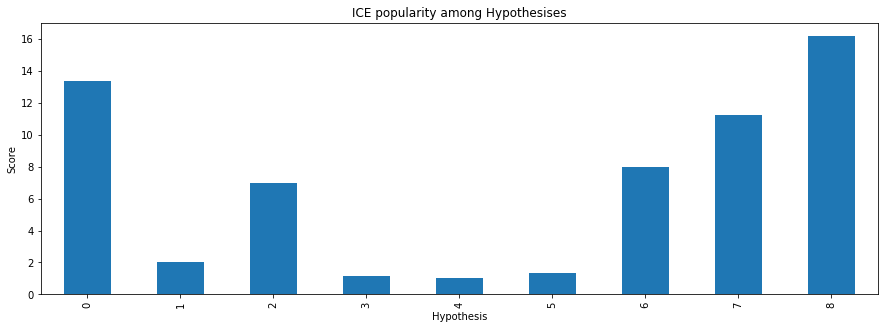

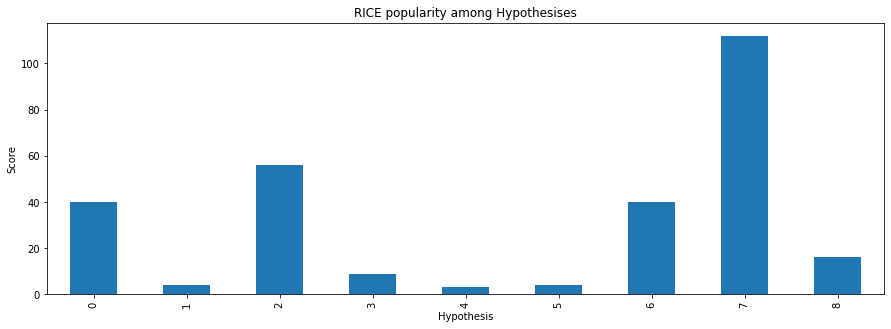

In [7]:
display(hypothesis_data[['Hypothesis','RICE','ICE','Reach']].sort_values(by=['Reach'], ascending = False))
display(hypothesis_data.corr())
#display(hypothesis_data['ICE'].hist())
#display(hypothesis_data['RICE'].hist())
plt.figure(figsize= (15,5))
hypothesis_data['ICE'].plot(kind="bar",title="ICE popularity among Hypothesises")
plt.xlabel('Hypothesis')
plt.ylabel('Score')
plt.show()
plt.figure(figsize= (15,5))
hypothesis_data['RICE'].plot(kind="bar",title="RICE popularity among Hypothesises")
plt.xlabel('Hypothesis')
plt.ylabel('Score')
plt.show()

**Priority changes when we add Reach as we multiply in RICe to give us a better understanding how hypothesis scores. Also, notice that Hypothesis 7 scored much higher when we sorted values based on Reach. Also, see corellation graph, RICE and Reach corellation is really high compared to ICE. ICE seems to corellate the most with COnfidence and Impact, which is predictable based on formula. It looks very different that Hypothesis 8 scored highest in ICE but almost very low in RICE. It is important when making decision because if we want to Reach a high number of users, we will need to look at RICE and ignore ICE results.**

<div class="alert alert-warning">
<b>Remarks: </b> You can improve quality of your visulatization with heatmap correlation matrix plots.<br>
Check this link: <a>https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec</a>
</div>

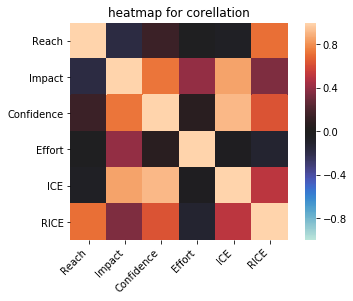

In [8]:
corr = hypothesis_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20.0, 220.0, n=20.0),
    square=True
)
plt.title('heatmap for corellation')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<div class="alert alert-success">
<b>Success:</b> Well done!
</div>

<span style="color:red">**Conclusion of Part 1 Prioritizing Hypothesis:**</span>


**In our ICE framewor hypothesis # 8 (Launch a promotion that gives users discounts) scored highest. But when we applied RICE framework, hypothesis # 8 no longer was a leader. It was somewhere in the middle because it's Reach of users is too low. Hence, we suggest to go with RICE hypothesis # 7 because it reaches all users and scores high in both RICE and ICE. If we care how many users we reach, RICE score shows Hypothesis 7 is what we should choose, If we do not care which hypothesis we care for then, we should go with Hypothesis 8 in ICE score.**

<div class="alert alert-success">
<b>Success:</b> Yes, I agree with you. Good point!
</div>

# Part 2. A/B Test Analysis
## The Task is to:
    1.Analyze the A/B test:
    2.Graph cumulative revenue by group. Make conclusions and conjectures.
    3.Graph cumulative average order size by group. Make conclusions and conjectures.
    4.Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
    5.Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
    6.Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
    7.Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
    8.Plot a scatter chart of order prices. Make conclusions and conjectures.
    9.Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
    10.Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
    11.Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
    12.Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
    13.Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
    14.Make a decision based on the test results. The possible decisions are: 
        A. Stop the test, consider one of the groups the leader. 
        B. Stop the test, conclude that there is no difference between the groups. 
        C. Continue the test.

### Analyzing the A/B test:
**2.Graph cumulative revenue by group. Make conclusions and conjectures.**


In [9]:
datesGroups = transactions[['transaction_date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply \
(lambda x: transactions[np.logical_and(transactions['transaction_date'] <= x['transaction_date'], \
                                       transactions['group'] == x['group'])].\
 agg({'transaction_date' : 'max', \
      'group' : 'max', \
      'transactionId' : pd.Series.nunique, \
      'visitorId' : pd.Series.nunique, \
      'revenue' : 'sum'}), axis=1).sort_values(by=['transaction_date','group'])
ordersAggregated.head()

#visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

,transaction_date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


<div class="alert alert-warning">
<b>Remarks: </b> 
According to PEP-8, it is a good practice to split long lines to several chunks.<br>
Please, check this link: <a>https://www.python.org/dev/peps/pep-0008/#maximum-line-length </a>
    
Also it very inconvincible for reviews or other users :)<b>Success:</b> Great that you did columns renaming and data type converting in one block, just after file reading.
</div>



**Above we see a sample where we aggregated by date and group how many visitors and revenue we had for each date**

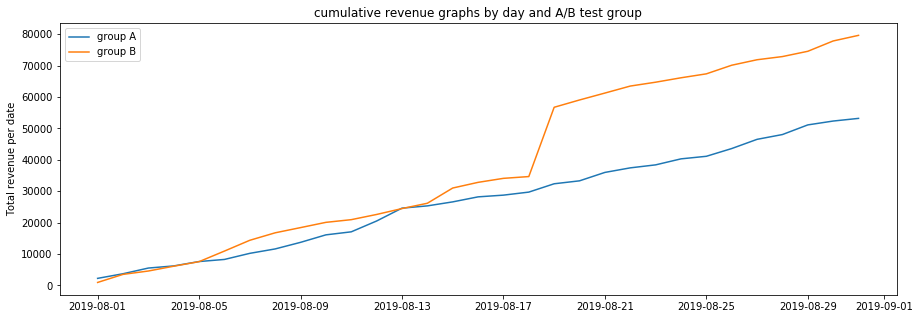

In [10]:
datesGroups = transactions[['transaction_date','group']].drop_duplicates() #orders table, renamed date to transaction_date

datesGroups = transactions[['transaction_date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
lambda x: transactions[np.logical_and(transactions['transaction_date'] <= x['transaction_date'], transactions['group'] == x['group'])].agg({'transaction_date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['transaction_date','group'])

#print(ordersAggregated)

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['transaction_date'], visitors['group'] == x['group'])].agg({'date' : 'max','group' : 'max','visits' : 'sum'}), axis=1).sort_values(by=['group'])

#print(visitorsAggregated)

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['transaction_date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'date_v','visitors']
#cumulativeData
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize= (15,5))
plt.title('cumulative revenue graphs by day and A/B test group')
plt.ylabel('Total revenue per date')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='group A')
# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='group B')
plt.legend()
plt.show()



**Above we see the revenue graph for group A and B. We see that group B had quite a bump in revenue and it seems like so far group B has done better** 

**3.Graph cumulative average order size by group. Make conclusions and conjectures.**

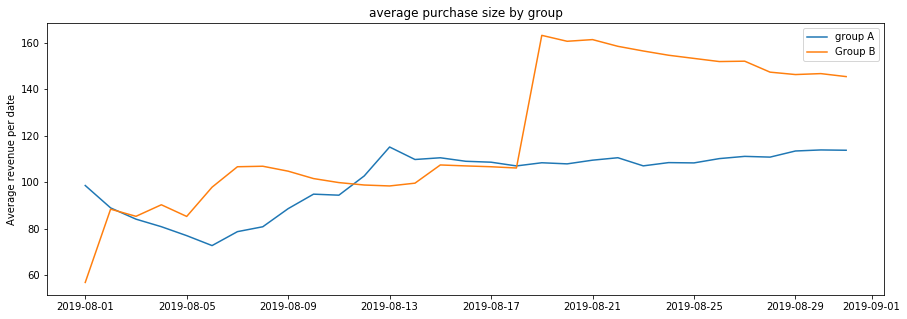

In [11]:
plt.figure(figsize= (15,5))
plt.title('average purchase size by group')
plt.ylabel('Average revenue per date')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='group A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Group B');

plt.legend();
plt.show()

**Above we see graph for average purchase size for each group. Seems like group B in total returned higher revenue as well, though it slowly started to descend after it peaked.**

**4.Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.**


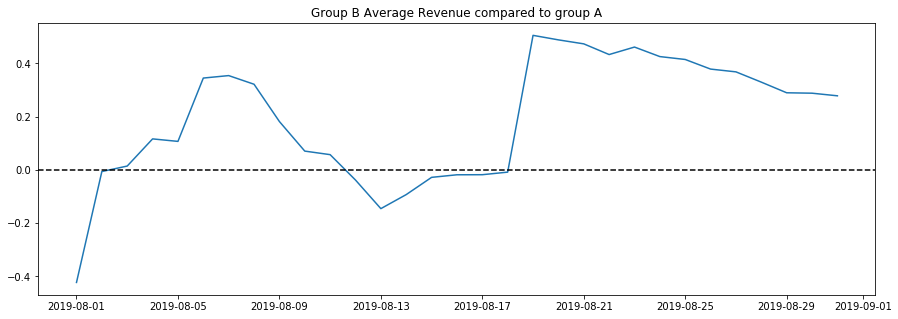

In [12]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#display(mergedCumulativeRevenue)
# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize= (15,5))
plt.title('Group B Average Revenue compared to group A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')


<div class="alert alert-success">
<b>Success:</b> Great visualizations! I like how you pay attenshion to details like adding x-axis.
</div

<div class="alert alert-warning">
<b>Remarks: </b> 
Do you familiar with the plotly library?
It can help you with interactive graphics creation.<br>
This is an advanced material, but I think you will hadle with it: <a>https://plotly.com/python/</a>
</div>


**Seems like group B did better than group A since it did not go below 0**

**5.Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.**

[Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 0.02488127193888086,
 0.03577235772357724]

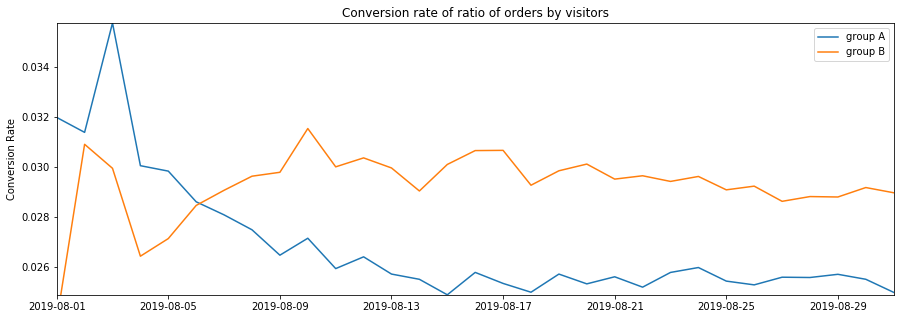

In [13]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize= (15,5))
plt.title('Conversion rate of ratio of orders by visitors')
plt.ylabel('Conversion Rate')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='group A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='group B')
plt.legend()
# setting the axes' scale
minx=cumulativeData['date'].min()
maxx=cumulativeData['date'].max()
miny=cumulativeDataA['conversion'].min()
maxy=cumulativeDataA['conversion'].max()
plt.axis([minx, maxx, miny, maxy])



**Again we see group  conversion rate of orders by visitors showing better results than group A**

**6.Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

,date,group,orders,buyers,revenue,date_v,visitors,conversion,order_per_user
0,2019-08-01,A,23,19,2266.6,2019-08-01,719,0.031989,1.210526
1,2019-08-01,B,17,17,967.2,2019-08-01,713,0.023843,1.000000
2,2019-08-02,A,42,36,3734.9,2019-08-02,1338,0.031390,1.166667
3,2019-08-02,B,40,39,3535.3,2019-08-02,1294,0.030912,1.025641
4,2019-08-03,A,66,60,5550.1,2019-08-03,1845,0.035772,1.100000
...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,2019-08-29,17708,0.028801,1.040816
58,2019-08-30,A,460,437,52363.7,2019-08-30,18037,0.025503,1.052632
59,2019-08-30,B,531,511,77863.5,2019-08-30,18198,0.029179,1.039139
60,2019-08-31,A,468,445,53212.0,2019-08-31,18736,0.024979,1.051685


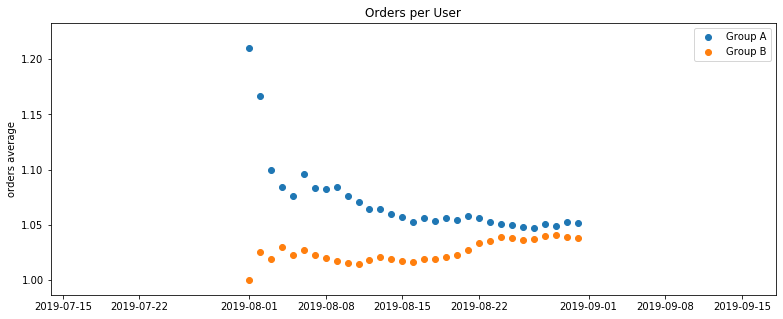

In [14]:
scattered = cumulativeData
scattered['order_per_user'] = scattered['orders']/scattered['buyers']
scatteredA=scattered[scattered['group']=='A']
scatteredB=scattered[scattered['group']=='B']
plt.figure(figsize=(13,5))
plt.title('Orders per User')
plt.ylabel('orders average')
plt.scatter(scatteredA['date'],scatteredA['order_per_user'],label='Group A')
plt.scatter(scatteredB['date'],scatteredB['order_per_user'],label='Group B')
plt.legend()
display(scattered)

**We see above a chart of Average number of orders per user for each group for each day. We see that average number of orders on days where average is over 1.13 orders per user could be counted as outlier day. We would need to see what happened on those days. See graph below to understand what could lead to Outlier days.**

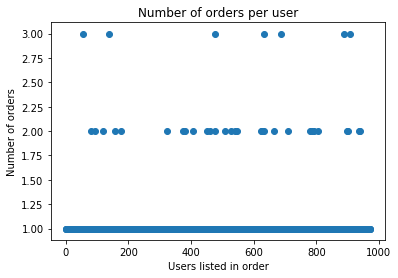

In [15]:
ordersByUsers = transactions.drop(['group', 'revenue', 'transaction_date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
#print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('Number of orders per user')
plt.ylabel('Number of orders')
plt.xlabel('Users listed in order')
plt.scatter(x_values, ordersByUsers['orders'])
#display(ordersByUsers)



**Above we see a chart for number of orders per user. We should consider order numbers more than 2 are outliers as most of our users order between 1 to 2 orders more commonly.**

**7.Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**


In [16]:
percentile=(np.percentile(scattered['order_per_user'], [95, 99])).tolist()
print('95th percentile for the number of orders per user: ', percentile[0])
print('99th percentile for the number of orders per user: ', percentile[1])

95th percentile for the number of orders per user:  1.09557150595883
99th percentile for the number of orders per user:  1.1837719298245615


**95th percentile for the number of orders per user:  1.09557150595883**,


 **99th percentile for the number of orders per user:  1.1837719298245615**
    


**8.Plot a scatter chart of order prices. Make conclusions and conjectures.**


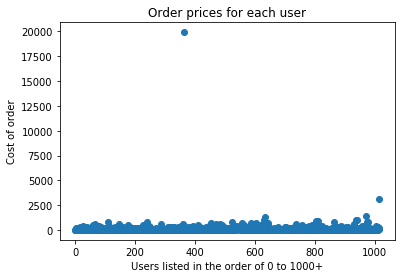

In [17]:
x_values = pd.Series(range(0, len(transactions['revenue'])))
plt.title('Order prices for each user')
plt.ylabel('Cost of order')
plt.xlabel('Users listed in the order of 0 to 1000+')
plt.scatter(x_values, transactions['revenue'])

**We see that there are 2 outlying transcactions. 1st is a user that returned revenue of about 20,000 dollars. And there are is another user that returned revenue of 2500.**

**9.Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**


In [18]:
percentile=(np.percentile(transactions['revenue'], [95, 99])).tolist()
print(percentile)

[414.275, 830.3]


<div class="alert alert-warning">
<b>Remarks: </b> 
Good! Also, boxplots can enforce your analysis from the visual part.<br>
Matplotlib: <a>https://matplotlib.org/3.3.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py</a><br>
Plotly: <a>https://plotly.com/python/box-plots/</a>
</div>

**95th Percentile for orders is 435 dollars , while 99th percentile is 900 dollars. We should assume that anything above 95th percentile is an outlier. That way we can ignore abnormalities and reduce our expectations. If revenue exceeds 435 dollars for a user on a given day, we should treat it as anomaly.**

**10.Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.**


In [19]:
ordersByUsersA = transactions[transactions['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = transactions[transactions['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))


0.00551
0.160


In [20]:
stats.mannwhitneyu(sampleA, sampleB)

MannwhitneyuResult(statistic=176468368.0, pvalue=0.0055090420550073455)

**P value is less than 0.05 so we reject the null hypothesis that there's a statistically significant difference in conversion between the groups using raw data. But the relative gain of group B is 16.2% (the second row of the output)**



**11.Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.**


In [21]:
print("{0:.3f}".format(stats.mannwhitneyu(transactions[transactions['group']=='A']['revenue'], transactions[transactions['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(transactions[transactions['group']=='B']['revenue'].mean()/transactions[transactions['group']=='A']['revenue'].mean()-1))

0.431
0.278


**The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups using raw data. Also, the average order size for group B is much higher than it is for group A by ~28%.**


**12.Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.**


In [22]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = transactions[transactions['revenue'] > 2500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.005
0.181


In [23]:
stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

MannwhitneyuResult(statistic=176373340.0, pvalue=0.004800141346853687)

**P value is less than 0.05, means for filtered data we reject Null hypothesis that there is no difference between groups, however we see that conversion is at 18% more for group B, not much difference between raw and filtered data.**

**13.Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.**


In [24]:
print("{0:.3f}".format(stats.mannwhitneyu(
    transactions[np.logical_and(
        transactions['group']=='A',
        np.logical_not(transactions['visitorId'].isin(abnormalUsers)))]['revenue'],
    transactions[np.logical_and(
        transactions['group']=='B',
        np.logical_not(transactions['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    transactions[np.logical_and(transactions['group']=='B',np.logical_not(transactions['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    transactions[np.logical_and(
        transactions['group']=='A',
        np.logical_not(transactions['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.337
-0.091


In [25]:
stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

MannwhitneyuResult(statistic=176373340.0, pvalue=0.004800141346853687)

**The p-value increased and shows ~34% which means we can not reject null hypothesis. but now the difference between the segments is -9% instead of 27%. Although our general conclusions from the test didn't change, this example demonstrates clearly how anomalies can affect A/B test results!**

    14.Make a decision based on the test results. The possible decisions are: 
        A. Stop the test, consider one of the groups the leader. 
        B. Stop the test, conclude that there is no difference between the groups. 
        C. Continue the test.

***P value is less than 0.05 for both filtered and raw data so we reject the null hypothesis that there's a statistically significant difference in conversion between the groups. Also relative gain of group B is much higher compared to A***

***The raw data showed a statistically significant difference between the groups in terms of average purchase size. Also, after the anomalies were removed, it turned out there was a statistically significant difference was still there in the anomaly of filtered data for average order size between groups A and B.***

***The graph of the difference in conversion between the groups shows that group B's results are better than those of group A.***
***So we will go with Option A where group leader is B from all our charts showing where B did better than group A***

<span style="color:red">**Conclusion of Part 1Prioritizing Hypothesis and Part 2 Analyzing the A/B test:**</span>

In our ICE framewor hypothesis # 8 (Launch a promotion that gives users discounts) scored highest. But when we applied RICE framework, hypothesis # 8 no longer was a leader. It was somewhere in the middle because it's Reach of users is too low. Hence, we suggest to go with RICE hypothesis # 7 because it reaches all users and scores high in both RICE and ICE. If we care how many users we reach, RICE score shows Hypothesis 7 is what we should choose, If we do not care which hypothesis we care for then, we should go with Hypothesis 8 in ICE score.

We see that group B had quite a bump in revenue than group A. 

Average purchase size for each groupshows group B in total returned higher revenue. 

When we compared group B and A, we saw group B still did better than group A since it did not go below 0 where if it did dip below 0, then A would be the winner, or we might have needed to do more testing. 

At this point we can conclude A and B are different and B group has better revenue returns. 

We saw a chart for number of orders per user, we should consider order numbers more than 2 are outliers as most of our users order between 1 to 2 orders more common. 

95th Percentile for orders is 435 dollars , while 99th percentile is 900 dollars. We should assume that anything above 95th percentile is an outlier. That way we can ignore abnormalities and reduce our expectations. 

If revenue exceeds 435 dollars for a user on a given day, we should treat it as anomal.

P value is less than 0.05 so we reject the null hypothesis that there's a statistically significant difference in conversion between the groups using raw data. But the relative gain of group B is 16.2%

The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups using raw data. Also, the average order size for group B is much higher than it is for group A by ~28%.

P value is less than 0.05, means for filtered data we reject Null hypothesis that there is no difference between groups, however we see that conversion is at 18% more for group B, not much difference between raw and filtered data.

The p-value increased and shows ~34% which means we can not reject null hypothesis. but now the difference between the segments is -9% instead of 27%. Although our general conclusions from the test didn't change, this example demonstrates clearly how anomalies can affect A/B test results!


The graph of the difference in conversion between the groups shows that group B's results are better than those of group A. So we will go with Option A where group leader is B from all our charts showing where B did better than group A.
